In [1]:
# random forest for feature importance on a regression problem
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL-Final.csv')
df.head()

,Date,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
0,1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1,1/4/2000,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
2,1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
3,1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
4,1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
Date,,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1/4/2000,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [ ]:
# df['Close'].dtypes

In [ ]:
# df.dtypes

In [ ]:
# df["Close"].head()

In [ ]:
# df["Close"] = df["Close"].astype(str).str.replace(",","")
# close = df["Close"].apply(lambda x: float(x))
# df["Close"]=df["Close"].apply(pd.to_numeric)

In [ ]:
# df["Open"] = df["Open"].astype(str).str.replace(",","")
# open = df["Close"].apply(lambda x: float(x))

In [ ]:
# df["High"] = df["High"].astype(str).str.replace(",","")
# high = df["High"].apply(lambda x: float(x))

In [ ]:
# df["Low"] = df["Low"].astype(str).str.replace(",","")
# low = df["Low"].apply(lambda x: float(x))

In [ ]:
# df["eps"] = df["eps"].astype(str).str.replace(",","")
# eps = df["eps"].apply(lambda x: float(x))

In [ ]:
# df["pe"] = df["pe"].astype(str).str.replace(",","")
# pe = df["pe"].apply(lambda x: float(x))

In [ ]:
# df["InRate"] = df["InRate"].astype(str).str.replace(",","")
# inrate = df["InRate"].apply(lambda x: float(x))

In [ ]:
# df["InfRate"] = df["InfRate"].astype(str).str.replace(",","")
# infrate = df["InfRate"].apply(lambda x: float(x))

In [ ]:
# df["Adj Close"] = df["Adj Close"].astype(str).str.replace(",","")
# adjclose = df["Adj Close"].apply(lambda x: float(x))

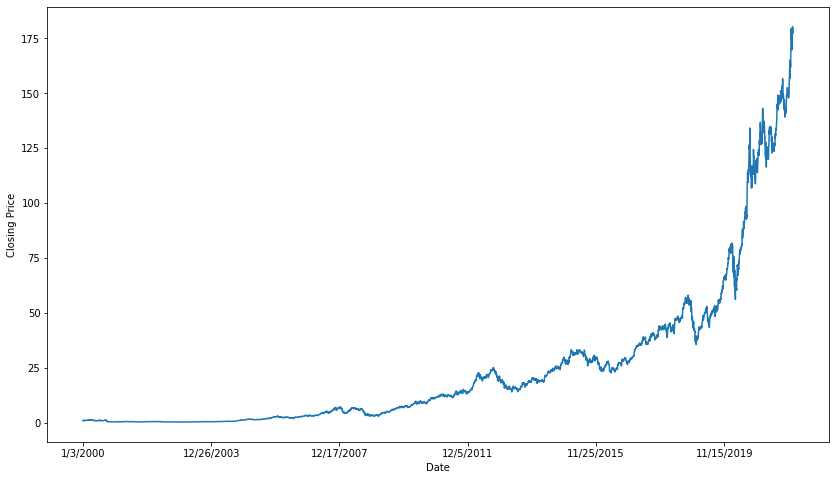

In [6]:
from matplotlib import pyplot as plt

df['Close'].plot(figsize=(14,8))
plt.ylabel("Closing Price")
plt.show()

In [7]:
df.isna().sum() 

Open         0
High         0
Low          0
eps          0
pe           0
InRate       0
InfRate      0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df["Close"].value_counts()

0.267857      6
0.348214      6
0.265179      5
0.262500      4
0.256429      4
             ..
3.478571      1
3.638929      1
3.498214      1
3.717143      1
177.570007    1
Name: Close, Length: 5057, dtype: int64

In [9]:
df.value_counts()

Open        High        Low         eps       pe         InRate    InfRate   Close       Adj Close   Volume    
0.231964    0.244107    0.230714    0.520628  17.162533  2.306215  2.291470  0.236429    0.201871    1016176000    1
23.973213   24.080357   23.769644   1.236860  11.159798  1.184747  1.959672  23.814285   20.420700   370725600     1
24.012501   24.190001   23.812500   1.403806  10.745268  0.892301  1.927236  24.190001   22.302607   110330800     1
24.010000   24.219999   23.902500   1.333655  10.883986  1.018283  1.936387  23.992500   21.539148   135180000     1
            24.157499   23.334999   1.400416  10.753257  0.898525  1.927480  23.355000   21.416540   533478800     1
                                                                                                                  ..
3.227143    3.284643    3.211071    0.837585  13.952021  1.825076  2.122726  3.278929    2.799654    1036173600    1
3.226786    3.374643    3.173571    0.991244  12.658076  1.584783  2.

In [ ]:
# df.drop("Volume", axis=1, inplace=True)

In [10]:
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
Date,,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1/4/2000,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [ ]:
# x = df.iloc[:, 0:9].values
# x


In [ ]:
# y = df.iloc[:, 8].values
# y

Feature: 0, Score: 0.00296
Feature: 1, Score: 0.00547
Feature: 2, Score: 0.00279
Feature: 3, Score: 0.00281
Feature: 4, Score: 0.53152
Feature: 5, Score: 0.41887
Feature: 6, Score: 0.02673
Feature: 7, Score: 0.00307
Feature: 8, Score: 0.00301
Feature: 9, Score: 0.00275


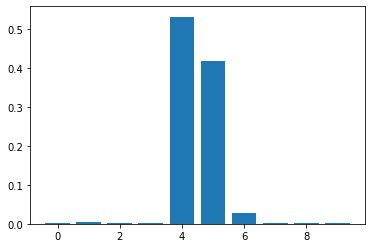

In [11]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()